# Dual Ascent

##### Contents

1.  [Quick Overview of Dual Ascent](#Overview) <br>
2.  [Application of Dual Ascent](#Application) <br>

More details on section _2.  Application of Dual Ascent_:
1. [Update Rules](#Update_Rules) <br>
2. [Code](#Code) <br>
    2.1. [Helper Functions](#Helper_Functions) <br>
    2.2. [Main Dual Ascent Function](#DA_Function) <br>
    2.3. [Running Dual Ascent](#Running_DA) <br>


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import Image

<br/>

### 1.  <a id = 'Overview'> Quick Overview of Dual Ascent </a>

Let us consider an optimization problem with *equality constraints*:
\begin{align*}
    \min_{x \in \mathbb{R}^d} \ &\ \ f(x)   \\
    \text{subject to} \ &\ \ Ax = b
\end{align*}
where $A$ is some $m \times d$ matrix.

Let $y \in \mathbb{R}^m$, it follows that the Lagrangian and its dual function are
\begin{align*}
    L(x,y) \ &= \ f(x) + y^T(Ax-b)  \\
    \hat{f}(y) \ &= \ \inf_{x \in \mathbb{R}^d} L(x,y)
        \ = \ \inf_{x \in \mathbb{R}^d}  \left( f(x) + y^T(Ax-b) \right)
\end{align*}

Given a step size $\alpha_t$ (which can be kept constant or updated with *backtracking line search*), the __dual ascent__ algorithm is thus:

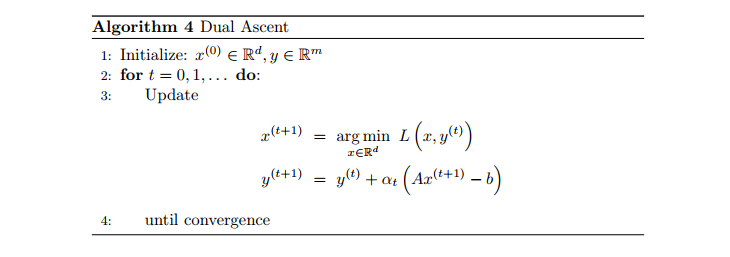

In [2]:
Image(filename = "Algorithm Summary/Dual Ascent.png", width=600, height=400)

More information on the **dual ascent** algorithm as well as its variants are summarized in the [Optimization - Algorithm Summary](https://github.com/thn003/optimization_num_analysis/blob/master/Optimization/Optimzation%20-%20Algorithm%20Summary.pdf).

***

<br/>

### 2.  <a id = 'Application'> Application of Dual Ascent </a>

In this project, we will

1.  Write a generic function to run *dual ascent* </br>
2.  Apply the function on $f(x) = x^T x$, $A$ is a $500 \times 1000$ matrix of standard gaussian entries, and $b = \mathbb{1}$
    
</br>

#### 2.1.  <a id = 'Update_Rules'> Update Rules </a>

From $f(x) = x^T x$, the Lagrangian is:
$$
    L(x, y) \ = \ x^Tx + y^T (Ax - b)
$$

The dual function is $\hat{f} = \inf_x L(x,y)$. The $y$-update, which is the gradient of $\hat{f}$ with respect to $y$, is:
$$
    \nabla_y \hat{f}(y) = Ax - b
$$

Taking the gradient of $L$ with respect to $x$ and setting that to $0$ gives the $x$-update:
$$
    \nabla_x L(x,y) = 2x + A^T y
    \ \ \ \implies \ x = - \frac{1}{2} A^T y
$$

Putting these together, the update rules are:
\begin{align*}
    x^{(t+1)} \ &= \ - \frac{1}{2} A^T y^{(t)}   \\
    y^{(t+1)} \ &= \ y^{(t)} + \alpha_t \left( Ax^{(t)} - b \right)   \\
\end{align*}

</br>


#### 2.2.  <a id = 'Code'> Code </a>

##### 2.2.1.  <a id = 'Helper_Functions'> Helper Functions </a>

We first define some helper functions to compute the functions and their gradients:

*  `f` for computing $f(x) = x^T x$
*  `cond` for the solution feasibility $\|Ax - b\|$
*  `plot` for plotting results

In [3]:
def f(x):
    return np.dot(x,x)

def cond(x):
    return np.linalg.norm( np.dot(A,x) - b, 2)

def plot(values, labels, colors, title, ylabel):
    k = len(labels)
    plt.box(False)
    for i in range(0,k):
        plt.plot(idx, values[i], '-', color = colors[i], alpha=.75, linewidth = 2, label = labels[i])
    plt.title(title, fontsize = 15)
    plt.ylabel(ylabel, fontsize = 12)
    plt.legend()

<br/>

##### 2.2.2.  <a id = 'DA_Function'> Main Dual Ascent Function </a>

In [4]:
def dual_ascent(x, y, alpha, T ):
    
    # Vector to store (1) loss value, (2) condition feasibility
    loss_vector, cond_vector = np.zeros(T), np.zeros(T)
    
    for t in range(0, T):       
        
        # Update x
        x = - np.dot( A.transpose(), y ) / 2
        # Update y
        y = y + alpha * ( np.dot(A,x) - b )
        
        # Update loss and feasibility
        loss_vector[t] = f(x)
        cond_vector[t] = cond(x)
        
    return loss_vector, cond_vector

<br/>

##### 2.2.3.  <a id = 'Running_DA'> Running Dual Ascent </a>

Since $A$ is random with fixed dimension, $b$ is fixed, it remains that the step size $\alpha_t$ is uncontrolled. We will thus play around with $\alpha_t$: running over different choices of $\alpha_t$ and observe the associated convergence rates.

In particular, we will run over these choices of $\alpha_t$:
$$
    \alpha_t \ \in \ \left\{ \|A\|^{-2}, \ .00005, \ .0001, \ .0005, \ .001 \right\}
$$
and fix $x = \mathbb{0}$, and $y$ is uniformly random in $[0,1]$.

In [5]:
# Problem parameters
m, d = 500, 1000
np.random.seed(173)
A = np.round(np.random.normal(0,1,m*d),3).reshape(m,d)
b = np.ones(m)

# Algorithm parameters
T = 1000
x = np.zeros(d)
y = np.random.rand(m)

Running the algorithm

In [6]:
alphas = [(1/np.linalg.norm(A,2))**2, .00005, .0001, .0005, .001]
T = 2000

# Initialize arrays to store losses and feasibility
DA_Loss, DA_Cond = list(), list()

# Run the model
for i in range(0, len(alphas)):
    loss_tmp, cond_tmp = dual_ascent( x, y, alphas[i], T )
    DA_Loss.append(loss_tmp)
    DA_Cond.append(cond_tmp)

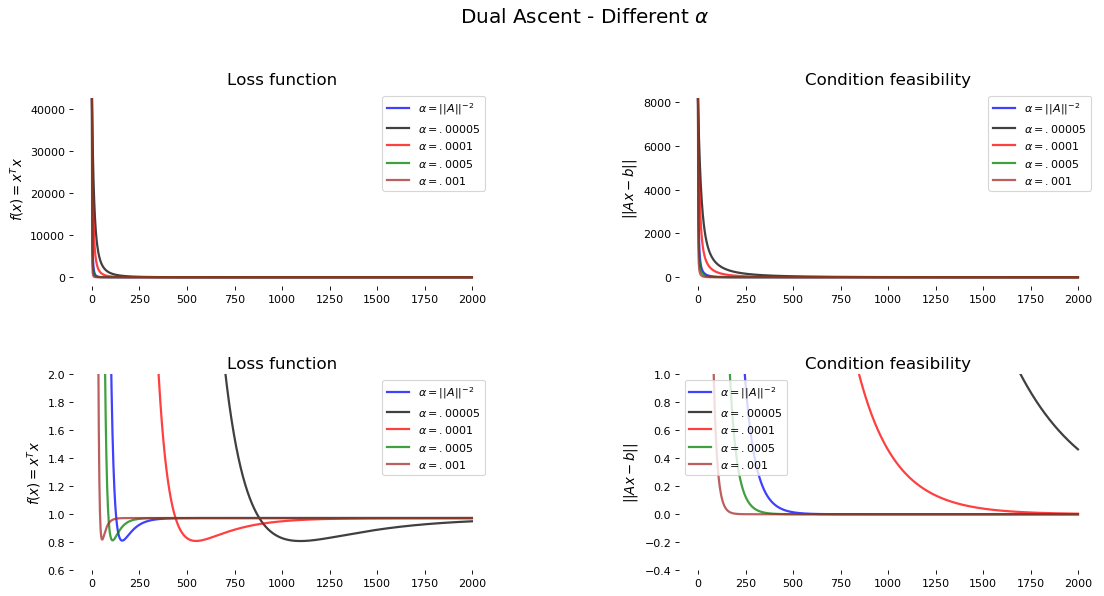

In [7]:
figure(num=None, figsize=(16, 8), dpi=80, facecolor='w')

labels = [r'$\alpha = ||A||^{-2}$', r'$\alpha = .00005$', r'$\alpha = .0001$', r'$\alpha = .0005$', r'$\alpha = .001$']
colors = ['blue', 'black', 'red', 'green', 'brown']
idx = np.arange(0, T)

plt.subplot(2, 2, 1)
plot(DA_Loss, labels, colors, 'Loss function', '$f(x) = x^T x$')

plt.subplot(2, 2, 2)
plot(DA_Cond, labels, colors, 'Condition feasibility', '$||Ax - b||$')

plt.subplot(2, 2, 3)
plt.ylim(.6, 2)
plot(DA_Loss, labels, colors, 'Loss function', '$f(x) = x^T x$')

plt.subplot(2, 2, 4)
plt.ylim(-.4, 1)
plot(DA_Cond, labels, colors, 'Condition feasibility', '$||Ax - b||$')

# Common title
plt.suptitle('Dual Ascent - Different ' + r'$\alpha$', fontsize = 18)
plt.tight_layout()
plt.subplots_adjust(.1, .1, .9, .85, .45, .45)